## Observations and Insights 

In [3]:
#Observations:

1.	Bar plot /pyplot for Total number of Mice vs each Treatment, it is noticed the number of mice’s involved in treatment count for the drugs Capomulin and Ceftamin are same. At the end of the treatment , the Capomulin shown positive results and Ceftamin shown negative as per the line graph 
2.	Boxplot - Tumor treatment for four regimens vs Tumor volume it is noticed, 
    a.	Capomulin & Infubinol: When the median is in the middle of the box, and the whiskers are about the same on both sides of the box, then the distribution is symmetric.
    b.	Ramicane When the median is closer to the bottom of the box, and the whisker is shorter on the lower end of the box, then the distribution is positively skewed (skewed right).
    c.	Ceftamin When the median is closer to the top of the box, and the whisker is shorter on the lower end of the box, then the distribution is negatively skewed (skewed left).
3.	Line Plot Time Point vs Tumor volume analysis 
    a.	For “Capomulin" & "Ramicane” if timepoint is increasing, tumor volume is decreasing, it appeared these durgs showing positive results on a mouse 
    b.	For “Infubinol","Ceftamin”  if timepoint is increasing , tumor volume is increasing, it appeared these drugs showing negative  results on a mouse
4.	Scatter plot: 
    a.	Since the correlation between mouse weight vs tumor volume is 0.77 hence these two data sets are positively  co-related  
    b.	Based on existing best line fit, the Extrapolation is value outside our set of data points for a mouse weigh of 26  , the tumor volume would be 46.43.






SyntaxError: invalid syntax (<ipython-input-3-75e9042ad835>, line 3)

In [ ]:
#%matplotlib notebook

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mousestudy_df = pd.merge(mouse_metadata,study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
combined_mousestudy_df
combined_mousestudy_df.loc[1500:1550]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1500,s166,Placebo,Male,19,27,5,47.186788,0
1501,s166,Placebo,Male,19,27,10,49.000125,0
1502,s187,Propriva,Male,22,25,0,45.000000,0
1503,s187,Propriva,Male,22,25,5,47.576718,1
1504,s187,Propriva,Male,22,25,10,48.146351,1
1505,s187,Propriva,Male,22,25,15,52.081632,1
1506,s187,Propriva,Male,22,25,20,53.744734,1
1507,s187,Propriva,Male,22,25,25,56.485220,1
1508,s187,Propriva,Male,22,25,30,60.008783,2
1509,s337,Zoniferol,Male,14,27,0,45.000000,0


In [5]:
# Checking the number of mice.
mice_count=mouse_metadata['Mouse ID'].count()
mice_count

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mouse_id=combined_mousestudy_df[["Mouse ID","Timepoint"]]
duplicate_mouse_id = duplicate_mouse_id[duplicate_mouse_id.duplicated(["Mouse ID","Timepoint"], keep="first")]
print(duplicate_mouse_id)

    Mouse ID  Timepoint
909     g989          0
911     g989          5
913     g989         10
915     g989         15
917     g989         20


In [7]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id = duplicate_mouse_id.drop_duplicates(subset = "Mouse ID", keep = 'first')
duplicate_mouse_id_all_data = pd.merge(duplicate_mouse_id,combined_mousestudy_df, on='Mouse ID',how ='inner')
duplicate_mouse_id_all_data


,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,g989,0,Propriva,Female,21,26,0,45.000000,0
1,g989,0,Propriva,Female,21,26,0,45.000000,0
2,g989,0,Propriva,Female,21,26,5,48.786801,0
3,g989,0,Propriva,Female,21,26,5,47.570392,0
4,g989,0,Propriva,Female,21,26,10,51.745156,0
5,g989,0,Propriva,Female,21,26,10,49.880528,0
6,g989,0,Propriva,Female,21,26,15,51.325852,1
7,g989,0,Propriva,Female,21,26,15,53.442020,0
8,g989,0,Propriva,Female,21,26,20,55.326122,1
9,g989,0,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= combined_mousestudy_df.drop_duplicates(subset = "Mouse ID", keep = 'first')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_df_mousecount=clean_df ['Mouse ID'].count()
clean_df_mousecount

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
v_mean = combined_mousestudy_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
v_median=combined_mousestudy_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]

v_sd=combined_mousestudy_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]

v_var=combined_mousestudy_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
standarderror=combined_mousestudy_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
standarderror
 # This method is the most straighforward, creating multiple series and putting them all together at the end.

Summary_data = {'Tumor_volume_Mean':v_mean,
                'Tumor_volume_Median':v_median,
                'Tumor_volume_variance':v_var,
                'Tumor_volume_standard deviation':v_sd,
                'Tumor_volume_SEM':standarderror}
summary_stats=pd.DataFrame(Summary_data )
summary_stats

,Tumor_volume_Mean,Tumor_volume_Median,Tumor_volume_variance,Tumor_volume_standard deviation,Tumor_volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
mouse_summary_stats=combined_mousestudy_df.groupby(['Drug Regimen']).agg(
                                                   Tumor_volume_mean =('Tumor Volume (mm3)','mean'),
                                                    Tumor_volume_median =('Tumor Volume (mm3)', 'median'),
                                                    Tumor_volume_variance  =('Tumor Volume (mm3)', 'var'),
                                                 Tumor_volume_standdev  = ('Tumor Volume (mm3)','std') ,
                                                    Tumor_volume_sem  =('Tumor Volume (mm3)','sem')                  
                                                      ) 
                                                
mouse_summary_stats

,Tumor_volume_mean,Tumor_volume_median,Tumor_volume_variance,Tumor_volume_standdev,Tumor_volume_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#Each Treatment

each_treatment= combined_mousestudy_df.groupby('Drug Regimen')["Mouse ID"].count()

each_treatment
each_drug_treated=pd.DataFrame(each_treatment)
drug_treatment=each_drug_treated.reset_index()
drug_treatment

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,161
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


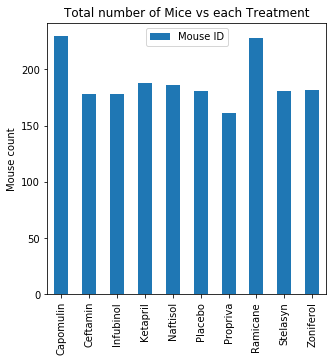

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_study_plot=drug_treatment.plot(kind="bar",figsize=(5,5))

# # PandasPlot.set_xticklabels() can be used to set the tick labels as well
mouse_study_plot.set_xticklabels(drug_treatment['Drug Regimen'])

# # Set a title for the chart
plt.title("Total number of Mice vs each Treatment")
plt.ylabel("Mouse count")

plt.legend(loc="best")
plt.show()
plt.tight_layout()                               


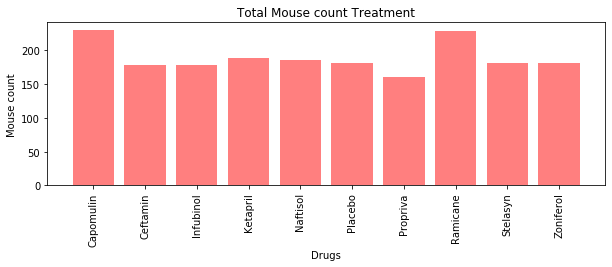

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(drug_treatment))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,3))
plt.bar(x_axis,drug_treatment["Mouse ID"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations,drug_treatment["Drug Regimen"], rotation="vertical")
plt.title("Total Mouse count Treatment")
plt.xlabel("Drugs")
plt.ylabel("Mouse count")
plt.show()
plt.tight_layout()                               


In [15]:
#Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_df['Sex'].value_counts(ascending=True)
#male_female=gender_group.reset_index()
gender_group

male_female=pd.DataFrame(gender_group)
male_female

,Sex
Female,124
Male,125


(-1.1016630746735625,
 1.1000791940320744,
 -1.1009347297692742,
 1.1017685314144794)

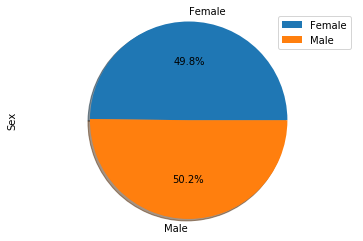

In [16]:
#clean_df.groupby(['Sex']).count().plot(kind='pie', y="Sex")
male_female.plot(kind='pie', y='Sex',autopct='%1.1f%%' ,shadow = True)
plt.axis("equal")

In [17]:
gender_count = mouse_metadata['Sex'].value_counts()
gender_count.values


array([125, 124], dtype=int64)

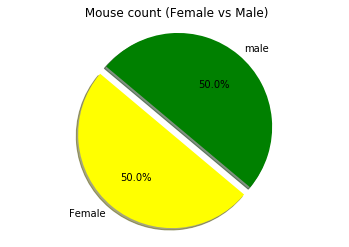

In [18]:
# # Generate a pie plot showing the distribution of female versus male mice using pyplot
gender=["Female","male"]
gender_count =mouse_metadata ['Sex'].value_counts()
colors = ["yellow","green"]
explode = (0.1,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(gender_count.value_counts(), explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.title(" Mouse count (Female vs Male)")
plt.axis("equal")
plt.show()


In [19]:
# Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
regimens_df = combined_mousestudy_df[combined_mousestudy_df["Drug Regimen"].isin(regimens_list)]
regimens_df                                                 

sum_tumor_vol= regimens_df.groupby(['Mouse ID','Drug Regimen']).sum()["Tumor Volume (mm3)"]
sum_tumor_vol



Mouse ID  Drug Regimen
a203      Infubinol       563.127077
a251      Infubinol       552.370946
a275      Ceftamin        527.709651
a411      Ramicane        407.013854
a444      Ramicane        430.600524
                             ...    
y769      Ceftamin        562.908873
y793      Capomulin       385.068292
y865      Ceftamin        549.985586
z578      Ramicane        384.115100
z581      Infubinol       539.795837
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [21]:


# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint = study_results.groupby('Mouse ID')["Timepoint","Tumor Volume (mm3)"].max()
greatest_timepoint

greatest_timepoint_df= pd.DataFrame(greatest_timepoint)
greatest_timepoint_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data= pd.merge(mouse_metadata,greatest_timepoint_df, on ="Mouse ID", how = "outer")
merge_data

C:\Users\Viswajani\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,45,45.000000
1,s185,Capomulin,Female,3,17,45,45.000000
2,x401,Capomulin,Female,16,15,45,45.473753
3,m601,Capomulin,Male,22,17,45,45.000000
4,g791,Ramicane,Male,11,16,45,45.851531
...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712
245,z435,Propriva,Female,12,26,10,48.710661
246,z581,Infubinol,Female,24,25,45,62.754451
247,z795,Naftisol,Female,13,29,45,65.741070


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset

treatment_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data=[]

for x in treatment_list:
    
    drug_locate =merge_data.loc[merge_data['Drug Regimen']== x]
    
    Tumor_volume_list =drug_locate["Tumor Volume (mm3)"] 
    tumor_vol_data.append(Tumor_volume_list)
    
    quartiles = Tumor_volume_list.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of Tumor volume for {x} is: {lowerq}")
    print(f"The upper quartile of Tumor volume for {x} is : {upperq}")
    print(f"The interquartile range of Tumor volume for {x} is is: {iqr}")
    print(f"The the median of Tumor volume is: {quartiles[0.5]} ")
    
# Determine outliers using upper and lower bounds

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.\n")

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of Tumor volume for Capomulin is: 45.0
The upper quartile of Tumor volume for Capomulin is : 46.74900552
The interquartile range of Tumor volume for Capomulin is is: 1.7490055199999972
The the median of Tumor volume is: 45.89372032 
Values below 42.376491720000004 could be outliers.
Values above 49.37251379999999 could be outliers.

The lower quartile of Tumor volume for Ramicane is: 45.0
The upper quartile of Tumor volume for Ramicane is : 46.34383237
The interquartile range of Tumor volume for Ramicane is is: 1.3438323700000012
The the median of Tumor volume is: 45.52187471 
Values below 42.984251445 could be outliers.
Values above 48.359580925 could be outliers.

The lower quartile of Tumor volume for Infubinol is: 54.04860769
The upper quartile of Tumor volume for Infubinol is : 65.52574285
The interquartile range of Tumor volume for Infubinol is is: 11.477135160000003
The the median of Tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outlier

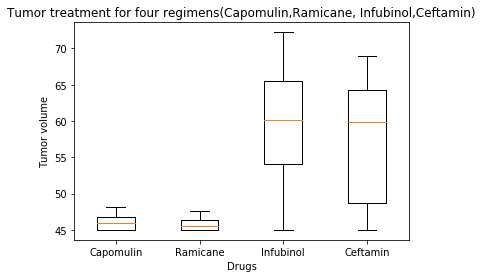

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()

ax1.set_title('Tumor treatment for four regimens(Capomulin,Ramicane, Infubinol,Ceftamin)')
ax1.set_ylabel('Tumor volume')
ax1.set_xlabel('Drugs')
ax1.boxplot(tumor_vol_data,labels=treatment_list)

plt.show()

## Line and Scatter Plots

In [35]:
#unique druglist Capomulin from the Mouse_metadata

drug_list = ["Capomulin"]
  
Capomulin_df = mouse_metadata[mouse_metadata["Drug Regimen"].isin (drug_list)]

Capomulin_df 
                  
                            


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
6,f966,Capomulin,Male,16,17
10,u364,Capomulin,Male,18,17
12,y793,Capomulin,Male,17,17
13,r554,Capomulin,Female,8,17
14,m957,Capomulin,Female,3,19
16,t565,Capomulin,Female,20,17
20,i738,Capomulin,Female,23,20


In [36]:
#based on unique Capomulin filtering the data in the study result to get the uniue mouse ids
list_of_mouseids = Capomulin_df ['Mouse ID']. values. tolist()
single_mouseid=list_of_mouseids[0]
single_mouseid

# study_results_df= study_results[study_results["Mouse ID"].isin(list_of_mouseids)] 
# study_results_df

study_results_df= study_results[study_results["Mouse ID"]== single_mouseid] 
study_results_df                               



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
228,s185,0,45.000000,0
447,s185,5,43.878496,0
671,s185,10,37.614948,0
714,s185,15,38.177232,0
968,s185,20,36.866876,0
1196,s185,25,33.949940,0
1377,s185,30,32.959671,1
1479,s185,35,28.328531,1
1652,s185,40,25.472143,1
1849,s185,45,23.343598,1


In [37]:
# Based on the above data grouped the timepoint and find the tumorsum.


# line_plot = study_results_df.groupby('Timepoint').sum()["Tumor Volume (mm3)"]
# final_line_plot_df=line_plot.reset_index()
# final_line_plot_df

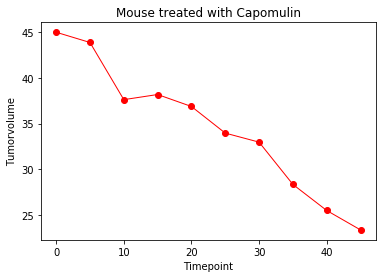

In [38]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

time_point=study_results_df ['Timepoint']
tumor_volume = study_results_df ['Tumor Volume (mm3)']
plt.title("Mouse treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumorvolume")


plt.plot(time_point,tumor_volume, marker="o", color="red", linewidth=1)
plt.show()



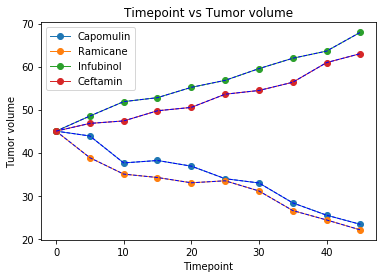

In [39]:
#generate the line plot for  the drugs ("Capomulin", "Ramicane", "Infubinol","Ceftamin) Timepoint versus Tumor volume.
drug_list=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
for x in drug_list:
    
    druglist_df = mouse_metadata[mouse_metadata["Drug Regimen"]== x ]

    
    list_of_mouseids = druglist_df['Mouse ID']. values. tolist()
    single_mouseid=list_of_mouseids[0]
    single_mouseid


    study_results_df= study_results[study_results["Mouse ID"]== single_mouseid] 
                                

    # Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
    time_point=study_results_df['Timepoint']
    tumor_volume = study_results_df['Tumor Volume (mm3)']
   
    
    plt.plot(time_point,tumor_volume, linewidth=1, marker="o",label=x)
    plt.plot(time_point,tumor_volume, "b--", linewidth=1)
    plt.title("Timepoint vs Tumor volume")
    plt.legend()
    plt.ylabel("Tumor volume")
    plt.xlabel("Timepoint")




plt.show()


In [40]:

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#unique druglist Capomulin from the Mouse_metadata

drug_cap = ["Capomulin"]
  
Capomulin_df = mouse_metadata[mouse_metadata["Drug Regimen"].isin (drug_cap)]

Capomulin_df 

# study_results_df= study_results[study_results["Mouse ID"].isin(list_of_mouseids)] 
# study_results_df
              
weight_tumor=pd.merge(Capomulin_df ,study_results,on="Mouse ID",how="inner")

weight_tumor



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,0,45.000000,0
1,s185,Capomulin,Female,3,17,5,43.878496,0
2,s185,Capomulin,Female,3,17,10,37.614948,0
3,s185,Capomulin,Female,3,17,15,38.177232,0
4,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
225,i557,Capomulin,Female,1,24,45,47.685963,1
226,r157,Capomulin,Male,22,25,0,45.000000,0
227,r157,Capomulin,Male,22,25,5,45.597064,0
228,r157,Capomulin,Male,22,25,10,46.059608,0


In [41]:
  
# Based on the above data grouped themouseid and find the tumoraverage.

avg_tumor_vol =weight_tumor.groupby(['Mouse ID']).median()["Tumor Volume (mm3)"]
avg_tumor_vol = avg_tumor_vol.reset_index()
weight = weight_tumor.set_index(["Mouse ID"])["Weight (g)"]
weight = weight.reset_index()
weight = weight.drop_duplicates(subset = "Mouse ID", keep = 'first')
weight_volume = pd.merge(avg_tumor_vol ,weight,on="Mouse ID",how="inner")
weight_volume 

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,42.996848,22
1,b742,39.346396,21
2,f966,35.624403,17
3,g288,42.621576,19
4,g316,44.851416,22
5,i557,44.798109,24
6,i738,37.645312,20
7,j119,44.792545,23
8,j246,44.287798,21
9,l509,44.854027,21


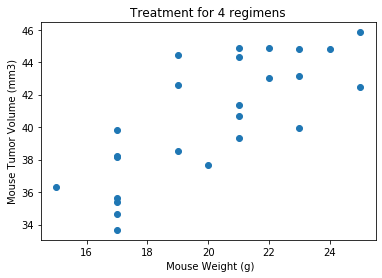

In [42]:
 # Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen. 
plt.scatter(weight_volume.iloc[:,2],weight_volume.iloc[:,1])
plt.title('Treatment for 4 regimens')
plt.xlabel(' Mouse Weight (g)')
plt.ylabel('Mouse Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [43]:

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Weight= weight_volume.iloc[:,2]
TumorVolume = weight_volume.iloc[:,1]
correlation = st.pearsonr(Weight,TumorVolume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.77


The r-squared is: 0.5881418338288318


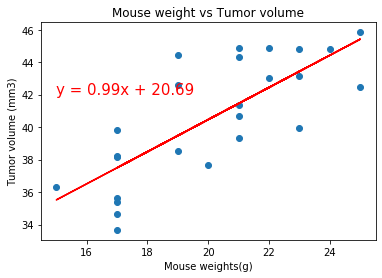

In [44]:
# Calculate the correlation coefficient and linear regression model
# Add the linear regression equation and line to plot
x_values = weight_volume['Weight (g)']
y_values = weight_volume['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,42),fontsize=15,color="red")
plt.title("Mouse weight vs Tumor volume")
plt.xlabel('Mouse weights(g)')
plt.ylabel('Tumor volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()